<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/Elder_Impulse_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install yfinance
!pip install pandas-ta==0.2.45b

In [37]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_ta as ta
import warnings 
warnings.filterwarnings("ignore")

In [38]:
START = "2015-01-01"  #yyyy-mm-dd
#END = '2020-05-01'

In [39]:
tker = '^nsei' #'^nsei'
nifty =yf.download(tker,start=START,interval='1wk')
nifty=nifty.dropna()
nifty=nifty.iloc[:,:4]


[*********************100%***********************]  1 of 1 completed


ElderImpulse
Impulse System for the price bars

Bullish price bar: (13-period EMA > previous 13-period EMA) and (MACD-Histogram > previous period's MACD-Histogram)
Bearish price bar: (13-period EMA < previous 13-period EMA) and (MACD-Histogram < previous period's MACD-Histogram)
Neutral price bar: when conditions for a bullish price bar or bearish price bar are not met.

In [40]:
nifty.ta.macd(append=True)
nifty.ta.ema(length=13,append=True)
nifty.ta.ema(length=50,append=True)
print()

In [41]:
nifty['Impulse']=0

In [42]:
for i in range(len(nifty)):
  if (nifty['EMA_13'].iloc[i]>nifty['EMA_13'].iloc[i-1] and nifty['MACDh_12_26_9'].iloc[i]>nifty['MACDh_12_26_9'].iloc[i-1]):
    nifty['Impulse'].iloc[i]=1
  elif (nifty['EMA_13'].iloc[i]<nifty['EMA_13'].iloc[i-1] and nifty['MACDh_12_26_9'].iloc[i]<nifty['MACDh_12_26_9'].iloc[i-1]):
    nifty['Impulse'].iloc[i]=-1
  else:
    nifty['Impulse'].iloc[i]=0    

In [43]:
nifty['Impulse'].value_counts()

 0    163
 1    138
-1     65
Name: Impulse, dtype: int64

In [44]:
nifty[-1:]

,open,high,low,close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_13,EMA_50,Impulse
date,,,,,,,,,,
2021-12-24,17149.5,17155.599609,16909.599609,17003.75,302.108569,-207.368468,509.477036,17284.56587,16088.752407,-1


In [45]:
nifty['signal50']=0

In [46]:
for i in range(len(nifty)):
  if (nifty['close'].iloc[i]>nifty['EMA_50'].iloc[i]):
    nifty['signal50'].iloc[i]=1
  elif (nifty['close'].iloc[i]<nifty['EMA_50'].iloc[i]):
    nifty['signal50'].iloc[i]=-1
  else:
    nifty['signal50'].iloc[i]=0 

# returns three weeks out for impulse change from  blue to green.

In [47]:
lst1=[]
lst2=[]
for i in range(len(nifty)):
  if (nifty['Impulse'].iloc[i]==1 and nifty['Impulse'].iloc[i-1]==0):
    lst1.append(((nifty['close'].iloc[i+3]-nifty['close'].iloc[i])/nifty['close'].iloc[i]*100))
    lst2.append(1)

In [48]:
lst=[lst1,lst2]

In [49]:
df=pd.DataFrame(lst).T
df.columns=['percentage_change','impulse change from 0 to 1']

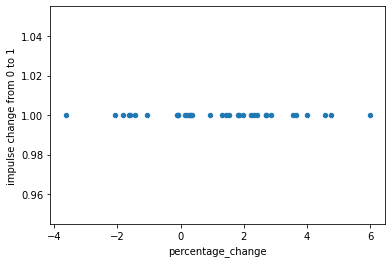

In [50]:
df.plot(x='percentage_change',y='impulse change from 0 to 1',kind='scatter');

# returns three weeks out for impulse change from  red to green.

In [51]:
lst=[]
for i in range(len(nifty)):
  if (nifty['Impulse'].iloc[i]==1 and nifty['Impulse'].iloc[i-1]==-1):
    lst.append(((nifty['close'].iloc[i+3]-nifty['close'].iloc[i])/nifty['close'].iloc[i]*100))

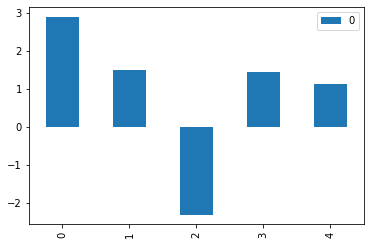

In [52]:
pd.DataFrame(lst).plot(kind='bar');

In [53]:
lst=[]
for i in range(len(nifty)):
  if (nifty['Impulse'].iloc[i]==-1 and nifty['Impulse'].iloc[i-1]==0):
    lst.append(((nifty['close'].iloc[i+3]-nifty['close'].iloc[i])/nifty['close'].iloc[i]*100))

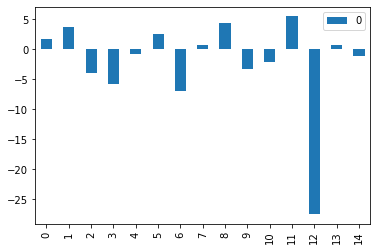

In [54]:
pd.DataFrame(lst).plot(kind='bar');

In [55]:
lst=[]
for i in range(len(nifty)):
  if (nifty['Impulse'].iloc[i]==-1 and nifty['Impulse'].iloc[i-1]==1):
    lst.append(((nifty['close'].iloc[i+3]-nifty['close'].iloc[i])/nifty['close'].iloc[i]*100))

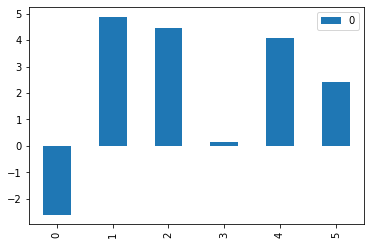

In [56]:
pd.DataFrame(lst).plot(kind='bar');

In [57]:
nifty[['Impulse','signal50']].to_csv('impulse.csv')